# **Dataset:**
- **https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data**

# **References:**

- https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data
- https://medium.com/@eskandar.sahel/exploring-feature-extraction-techniques-for-natural-language-processing-46052ee6514
- https://stackoverflow.com/questions/73849624/getting-error-while-submitting-notebook-on-kaggle-even-after-importing-nltk-libr
- https://github.com/NeelShah18/emot/tree/master
- https://medium.com/@yashj302/text-cleaning-using-regex-python-f1dded1ac5bd
- https://docs.python.org/3/library/re.html#regular-expression-syntax
- https://www.analyticsvidhya.com/blog/2022/01/text-cleaning-methods-in-nlp/
- https://www.analyticsvidhya.com/blog/2020/12/understanding-text-classification-in-nlp-with-movie-review-example-example/
- https://www.mygreatlearning.com/blog/bag-of-words/
- https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
- https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
- https://github.com/KeithGalli/pycon2020/blob/master/NLP_techniques.ipynb
- https://michael-fuchs-python.netlify.app/2021/06/19/nlp-text-pre-processing-vii-special-cases/
- https://github.com/MFuchs1989/Datasets-and-Miscellaneous/tree/main/datasets/NLP/Text%20Pre-Processing%20VII%20(Special%20Cases)
- https://scikit-learn.org/stable/modules/preprocessing.html
- https://medium.com/@pavanasreejanimmagadda55/text-preprocessing-in-nlp-11bf6c5e9f8a
- https://stackoverflow.com/questions/1787110/what-is-the-difference-between-lemmatization-vs-stemming
- https://www.reddit.com/r/MachineLearning/comments/g3t9jy/d_stemming_vs_lemmatization_whats_more_commonwhat/
- https://www.analyticsvidhya.com/blog/2021/06/part-3-step-by-step-guide-to-nlp-text-cleaning-and-preprocessing/
- https://www.kaggle.com/code/life2short/data-processing-replace-abbreviation-of-word
- https://medium.com/@amirhossein.abaskohi/text-cleaning-and-text-preprocessing-5a42f8e74b29
- https://heartbeat.comet.ml/how-to-perfectly-clean-your-text-data-for-nlp-29cfae79e243
- https://github.com/Abhayparashar31/crazytext/blob/main/crazytext/data/abbreviations_wordlist.json
- https://peetali.rbind.io/post/precomputed_kernel/
- https://stackoverflow.com/questions/72194501/nlp-how-to-speed-up-spelling-correction-on-147k-rows-filled-with-short-messages

# **Import Required Libraries:**

In [111]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Model selection and evaluation
from sklearn.model_selection import train_test_split  # For splitting the dataset into train and test sets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluating model performance
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels

# Text preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # For converting text data into numerical features
import nltk  # Natural Language Toolkit
from nltk.corpus import stopwords  # For removing stop words from text data
from nltk.tokenize import word_tokenize  # For tokenizing text into words
from nltk.stem import WordNetLemmatizer  # For lemmatizing words

# Machine learning models
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.naive_bayes import MultinomialNB  # Multinomial Naive Bayes classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Random Forest and Gradient Boosting classifiers
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
import xgboost as xgb  # XGBoost classifier


# Other libraries
import csv  # For reading and writing CSV files
import re  # For regular expressions
import subprocess  # For running external commands


import warnings  # For handling warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# **Set a random seed for NumPy to ensure reproducibility in our data processing:**

In [28]:
# Set random seed for NumPy
np.random.seed(42)

# **Load Dataset:**

In [29]:
# File path and chunk size for reading CSV data in chunks
file_path = '/kaggle/input/imdb-reviews/IMDB Dataset.csv'
chunk_size = 10000
chunks = []

# Try reading CSV file in chunks
try:
    # Use pd.read_csv with chunksize to read the CSV file in chunks
    reader = pd.read_csv(file_path, encoding='utf-8', engine='python', chunksize=chunk_size)
    
    # Iterate over each chunk of data
    for chunk in reader:
        try:
            # Append each chunk to the list of chunks
            chunks.append(chunk)
        except pd.errors.ParserError as e:
            # Handle ParserError if it occurs while processing a chunk
            print(f"ParserError while processing a chunk: {e}")
except pd.errors.ParserError as e:
    # Handle ParserError if it occurs during the initial read attempt
    print(f"ParserError: {e}")
    dataset = None

# If chunks were successfully loaded, concatenate them into a single DataFrame
if chunks:
    dataset = pd.concat(chunks, ignore_index=True)
    print('Success')
else:
    dataset = None

# Check if the dataset was loaded successfully and print the shape if available
if dataset is not None:
    print(f"DataFrame loaded successfully with {dataset.shape[0]} rows and {dataset.shape[1]} columns.")
else:
    print("Failed to load DataFrame.")


Success
DataFrame loaded successfully with 50000 rows and 2 columns.


# **Explore, Visualise & Clean Dataset:**

In [30]:
# Displaying the first 10 rows of the dataset
dataset.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [31]:
# The shape of the dataset
dataset.shape

(50000, 2)

In [32]:
# Review Sample from the dataset
dataset['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [33]:
# Concise summary of the DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


- DataFrame has 50,000 rows.
- DataFrame has a total of 2 columns, review and sentiment.
- Both columns have 50,000 non-null entries, meaning there are no missing values.

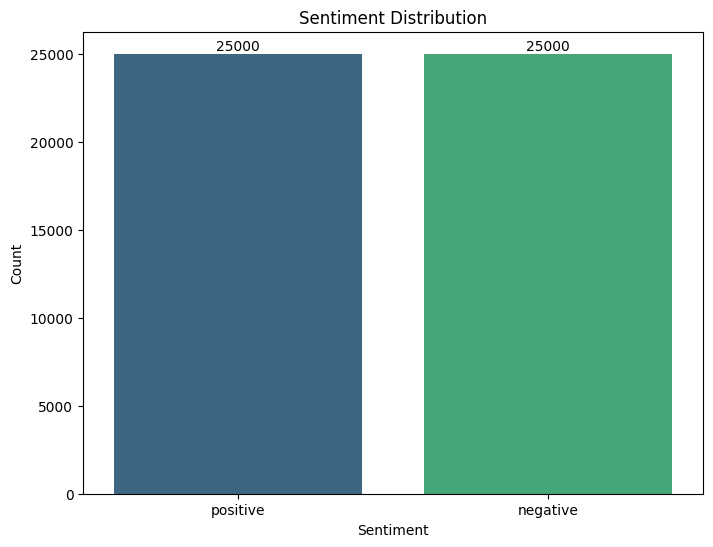

In [34]:
# Count the occurrences of each sentiment
dataset['sentiment'].value_counts().reset_index()
sentiment_counts = dataset['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

# Plotting with seaborn
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='sentiment', y='count', data=sentiment_counts, palette='viridis')

# Annotating bars with counts
for index, row in sentiment_counts.iterrows():
    bar_plot.text(index, row['count'], row['count'], color='black', ha="center", va='bottom')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

- The dataset is evenly distributed for both the positive and negative sentiments.
- The even distribution of the sentiments in the dataset will provide a solid foundation for developing accurate and reliable sentiment analysis models. 
- With balanced representation across all sentiment classes, the dataset will provide a fair evaluation of model performance, mitigates biases, and simplifies the preprocessing steps, ultimately contributing to the effectiveness and trustworthiness of sentiment analysis solutions derived from the dataset.

In [35]:
# Counting duplicates in the dataset
num_duplicates_before = dataset.duplicated().sum()
print("Number of duplicates in the dataset before removing:", num_duplicates_before)

# Dropping duplicates
dataset.drop_duplicates(inplace=True)

# Counting duplicates after removal
num_duplicates_after = dataset.duplicated().sum()
print("Number of duplicates in the dataset after removing:", num_duplicates_after)

# Printing number of rows and columns after removing duplicates
num_rows, num_cols = dataset.shape
print("Number of rows after removing duplicates:", num_rows)
print("Number of columns after removing duplicates:", num_cols)

Number of duplicates in the dataset before removing: 418
Number of duplicates in the dataset after removing: 0
Number of rows after removing duplicates: 49582
Number of columns after removing duplicates: 2


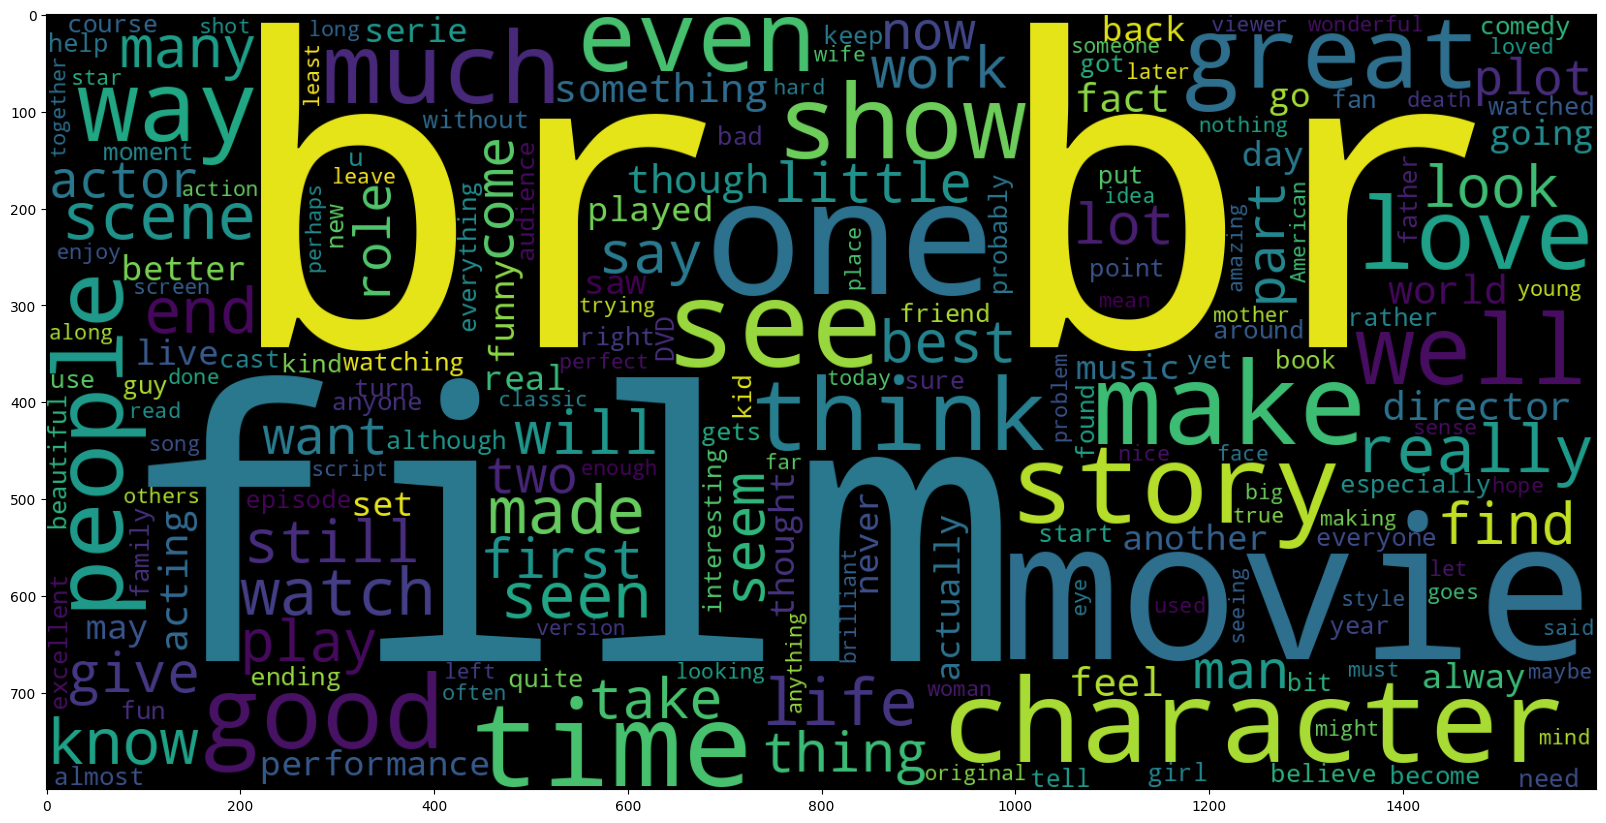

In [36]:
# Creating a Word Cloud to visualize positive review text

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(dataset[dataset['sentiment'] == 'positive']['review']))
plt.imshow(wc)

# Word clouds display word frequency visually, with more frequent words appearing larger.
# This word cloud represents the most common words found in positive reviews.

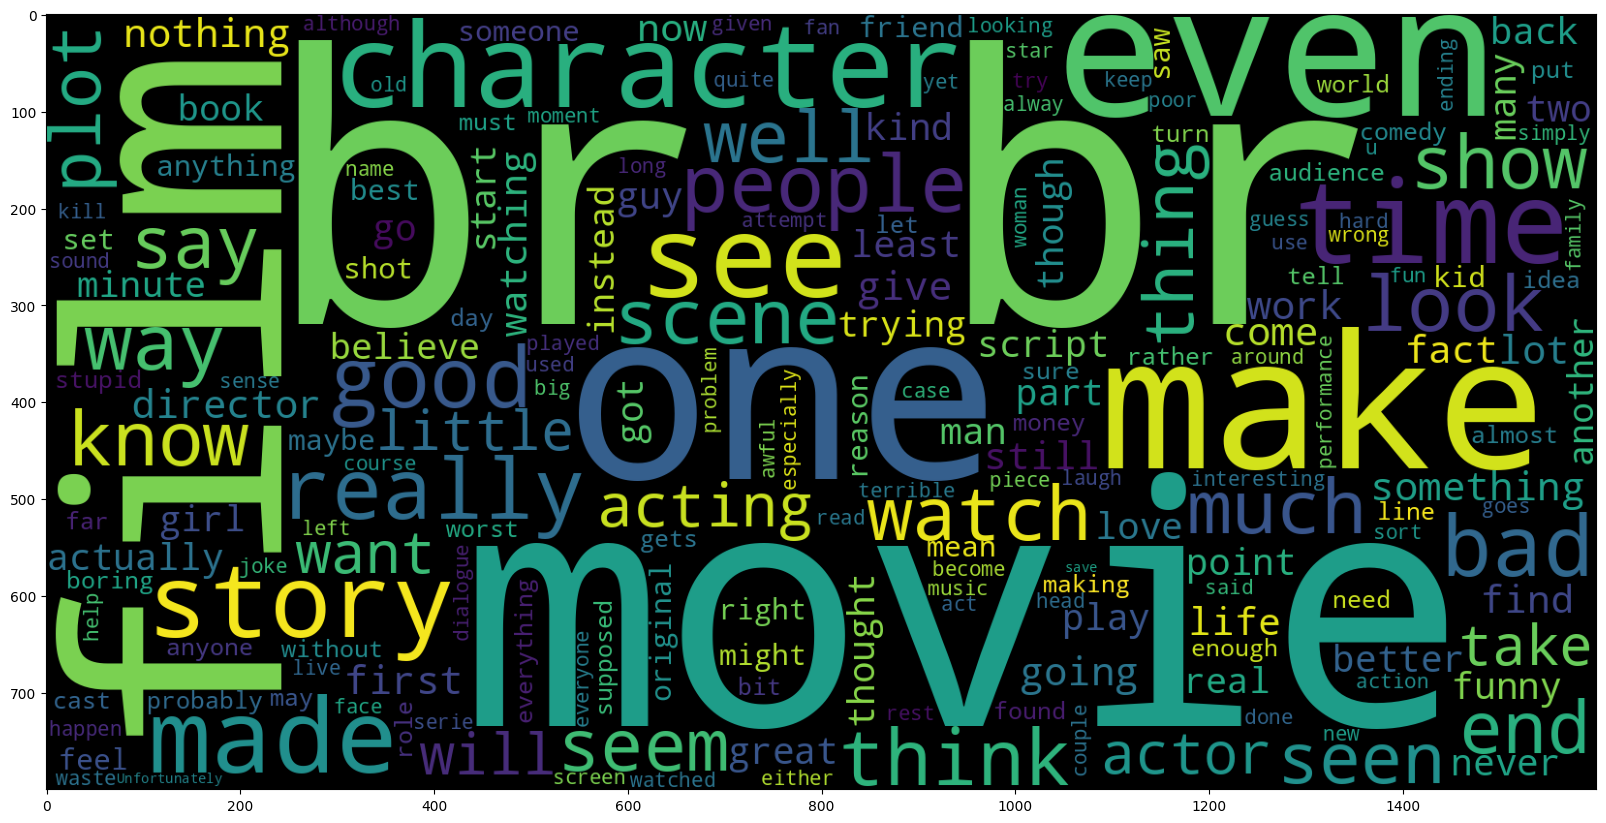

In [37]:
# Creating a Word Cloud to visualize negative review text

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(dataset[dataset['sentiment'] == 'negative']['review']))
plt.imshow(wc)

# Word clouds display word frequency visually, with more frequent words appearing larger.
# This word cloud represents the most common words found in negative reviews.

# **Create Text Preprocessing Functions:**
- Lower casing
- Removal of emojis
- Removal of emoticons
- Removal of URLs
- Removal of Emails
- Removal of HTML tags
- Removal of Non-Ascii Characters
- Removal of Punctuations & Special Characters
- Removal of Numbers
- Removal of Chat Words
- Removal of Stopwords
- Lemmatization


### **Lowercase Text Function**

In [38]:
def lowercase_text(text):
    """
    Convert text to lowercase.

    Args:
    - text (str): The text to convert to lowercase.

    Returns:
    - str: The text converted to lowercase.
    """
    # Convert the input text to lowercase using the lower() method
    return text.lower()

In [39]:
# Accessing a sample review text from the dataset
sample_text = dataset['review'][0]

# Printing the sample review text
print("Sample review text: \n")

# Displaying the sample review text
sample_text

Sample review text: 



"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [40]:
# Converting the sample review text to lowercase using the lowercase_text function
sample_text = lowercase_text(sample_text)

# Printing the cleaned sample review text
print("Cleaned sample review text: \n")

# Displaying the cleaned sample review text
sample_text

Cleaned sample review text: 



"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

### **Remove all Non-ASCII characters Emojis Function**
**This function will remove all non-ASCII characters, including emojis, symbols and escape sequences.**

In [41]:
def remove_non_ascii_and_emojis(text):
    """
    Remove non-ASCII characters and emojis from text.

    Args:
    - text (str): The input text containing non-ASCII characters and emojis.

    Returns:
    - str: The text with non-ASCII characters and emojis removed.
    """
    # Replace all non-ASCII characters with a space
    text = re.sub(r'[^\x00-\x7F]', ' ', text)
    
    # Define a pattern to remove emojis and symbols using regex
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F700-\U0001F77F"  # Alchemical Symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols & Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols & Pictographs Extended-A
        "\U00002600-\U000026FF"  # Miscellaneous Symbols
        "\U00002700-\U000027BF"  # Dingbats
        "]+", flags=re.UNICODE
    )
    # Remove emojis and symbols from the text
    text = emoji_pattern.sub(r'', text)
    
    # Normalize whitespace by replacing multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


In [42]:
# Accessing a sample review text from the dataset
sample_text = dataset['review'][13735]

# Printing the sample review text
print("Sample review text: \n")

# Displaying the sample review text
sample_text


Sample review text: 



'I checked this movie out based on a favorable review on this page. It is slow moving and the payoff is a four star dud..The only mystery here is how Oscar® winner F. Murray Abraham got involved with such a lousy script!'

In [43]:
# Clean the sample review text by removing non-ASCII characters and emojis
sample_text = remove_non_ascii_and_emojis(sample_text)

# Print the cleaned sample review text
print("Cleaned sample review text: \n")

# Display the cleaned sample review text
sample_text


Cleaned sample review text: 



'I checked this movie out based on a favorable review on this page. It is slow moving and the payoff is a four star dud..The only mystery here is how Oscar winner F. Murray Abraham got involved with such a lousy script!'

In [44]:
# Accessing a sample review text from the dataset
sample_text = dataset['review'][907]

# Printing the sample review text
print("Sample review text: \n")

# Displaying the sample review text
sample_text

Sample review text: 



"Following directly from where the story left off in part one, the second half which sets about telling the inevitable downfall and much more grim side of the man's legacy is exactly as such. In direct contrast to the first feature, part two represents a shift from Che the pride and glory of a revolutionised country, to Che\x97struggling liberator of a country to which he has no previous ties. The change of setting isn't just aesthetic; from the autumn and spring greys of the woodlands comes a change of tone and heart to the feature, replacing the optimism of the predecessor with a cynical, battered and bruised reality aligned to an all new struggle. Yet, as Che would go on to say himself\x97such a struggle is best told exactly as that\x97a struggle. While Part One certainly helped document that initial surge to power that the revolutionary guerrilla acquired through just that, Part Two takes a much more refined, callous and bleak segment of Che's life and ambition, and gives it an ass

In [45]:
# Clean the sample review text by removing non-ASCII characters and emojis
sample_text = remove_non_ascii_and_emojis(sample_text)

# Print the cleaned sample review text
print("Cleaned sample review text: \n")

# Display the cleaned sample review text
sample_text

Cleaned sample review text: 



"Following directly from where the story left off in part one, the second half which sets about telling the inevitable downfall and much more grim side of the man's legacy is exactly as such. In direct contrast to the first feature, part two represents a shift from Che the pride and glory of a revolutionised country, to Che struggling liberator of a country to which he has no previous ties. The change of setting isn't just aesthetic; from the autumn and spring greys of the woodlands comes a change of tone and heart to the feature, replacing the optimism of the predecessor with a cynical, battered and bruised reality aligned to an all new struggle. Yet, as Che would go on to say himself such a struggle is best told exactly as that a struggle. While Part One certainly helped document that initial surge to power that the revolutionary guerrilla acquired through just that, Part Two takes a much more refined, callous and bleak segment of Che's life and ambition, and gives it an assertive po

### **Replace Abbreviations Function**

#### **Abbreviation Dataset 1:**
**- https://www.kaggle.com/code/life2short/data-processing-replace-abbreviation-of-word**

In [46]:
# Dictionary containing common contractions and their expanded forms
abbreviations_dict_1 = {
        
    "what's":"what is",
    "what're":"what are",
    "who's":"who is",
    "who're":"who are",
    "where's":"where is",
    "where're":"where are",
    "when's":"when is",
    "when're":"when are",
    "how's":"how is",
    "how're":"how are",

    "i'm":"i am",
    "we're":"we are",
    "you're":"you are",
    "they're":"they are",
    "it's":"it is",
    "he's":"he is",
    "she's":"she is",
    "that's":"that is",
    "there's":"there is",
    "there're":"there are",

    "i've":"i have",
    "we've":"we have",
    "you've":"you have",
    "they've":"they have",
    "who've":"who have",
    "would've":"would have",
    "not've":"not have",

    "i'll":"i will",
    "we'll":"we will",
    "you'll":"you will",
    "he'll":"he will",
    "she'll":"she will",
    "it'll":"it will",
    "they'll":"they will",

    "isn't":"is not",
    "wasn't":"was not",
    "aren't":"are not",
    "weren't":"were not",
    "can't":"can not",
    "couldn't":"could not",
    "don't":"do not",
    "didn't":"did not",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "doesn't":"does not",
    "haven't":"have not",
    "hasn't":"has not",
    "hadn't":"had not",
    "won't":"will not"
}

#### **Abbreviation Dataset 2:**
**- https://github.com/Abhayparashar31/crazytext/blob/main/crazytext/data/abbreviations_wordlist.json**

In [47]:
# Dictionary containing common contractions and their expanded forms
abbreviations_dict_2 = {
    
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired",
    "ain't": "am not",
	"aren't": "are not",
	"can't": "cannot",
	"can't've": "cannot have",
	"'cause": "because",
	"could've": "could have",
	"couldn't": "could not",
	"couldn't've": "could not have",
	"didn't": "did not",
	"doesn't": "does not",
	"don't": "do not",
	"hadn't": "had not",
	"hadn't've": "had not have",
	"hasn't": "has not",
	"haven't": "have not",
	"he'd": "he would",
	"he'd've": "he would have",
	"he'll": "he will",
	"he'll've": "he will have",
	"he's": "he is",
	"how'd": "how did",
	"how'd'y": "how do you",
	"how'll": "how will",
	"how's": "how does",
	"i'd": "i would",
	"i'd've": "i would have",
	"i'll": "i will",
	"i'll've": "i will have",
	"i'm": "i am",
	"i've": "i have",
	"isn't": "is not",
	"it'd": "it would",
	"it'd've": "it would have",
	"it'll": "it will",
	"it'll've": "it will have",
	"it's": "it is",
	"let's": "let us",
	"ma'am": "madam",
	"mayn't": "may not",
	"might've": "might have",
	"mightn't": "might not",
	"mightn't've": "might not have",
	"must've": "must have",
	"mustn't": "must not",
	"mustn't've": "must not have",
	"needn't": "need not",
	"needn't've": "need not have",
	"o'clock": "of the clock",
	"oughtn't": "ought not",
	"oughtn't've": "ought not have",
	"shan't": "shall not",
	"sha'n't": "shall not",
	"shan't've": "shall not have",
	"she'd": "she would",
	"she'd've": "she would have",
	"she'll": "she will",
	"she'll've": "she will have",
	"she's": "she is",
	"should've": "should have",
	"shouldn't": "should not",
	"shouldn't've": "should not have",
	"so've": "so have",
	"so's": "so is",
	"that'd": "that would",
	"that'd've": "that would have",
	"that's": "that is",
	"there'd": "there would",
	"there'd've": "there would have",
	"there's": "there is",
	"they'd": "they would",
	"they'd've": "they would have",
	"they'll": "they will",
	"they'll've": "they will have",
	"they're": "they are",
	"they've": "they have",
	"to've": "to have",
	"wasn't": "was not",
	" u ": " you ",
	" ur ": " your ",
	" n ": " and ",
	"won't": "would not",
	"dis": "this",
	"brng": "bring",
    "cal": "calories",
    "cm":"centimetre",
    "min":"minute",
    "m":"metre",
    "km":"kilo-metre",
    "kg": "kilogram",
    "vs"	:"versus"

}

#### **Abbreviation Dataset 3:**
**- https://github.com/MFuchs1989/Datasets-and-Miscellaneous/blob/main/datasets/NLP/Text%20Pre-Processing%20VII%20(Special%20Cases)/chat_expressions.csv**

In [48]:
# Dictionary containing common contractions and their expanded forms
abbreviations_dict_3 = {
    
    "afaik": "as far as i know",
    "afk": "away from keyboard",
    "asap": "as soon as possible",
    "atk": "at the keyboard",
    "atm": "at the moment",
    "a3": "anytime anywhere anyplace",
    "bak": "back at keyboard",
    "bbl": "be back later",
    "bbs": "be back soon",
    "bfn": "bye for now",
    "b4n": "bye for now",
    "brb": "be right back",
    "brt": "be right there",
    "btw": "by the way",
    "b4": "before",
    "b4n": "bye for now",
    "cu": "see you",
    "cul8r": "see you later",
    "cya": "see you",
    "faq": "frequently asked questions",
    "fc": "fingers crossed",
    "fwiw": "for what it's worth",
    "fyi": "for your information",
    "gal": "get a life",
    "gg": "good game",
    "gn": "good night",
    "gmta": "great minds think alike",
    "gr8": "great!",
    "g9": "genius",
    "ic": "i see",
    "icq": "i seek you (also a chat program)",
    "ilu": "i love you",
    "imho": "in my honest opinion",
    "imo": "in my opinion",
    "iow": "in other words",
    "irl": "in real life",
    "kiss": "keep it simple, stupid",
    "ldr": "long distance relationship",
    "lmao": "laugh my ass off",
    "lol": "laughing out loud",
    "ltns": "long time no see",
    "l8r": "later",
    "mte": "my thoughts exactly",
    "m8": "mate",
    "nrn": "no reply necessary",
    "oic": "oh i see",
    "omg": "oh my goodness",
    "pita": "pain in the ass",
    "prt": "party",
    "prw": "parents are watching",
    "rofl": "rolling on the floor laughing",
    "roflol": "rolling on the floor laughing out loud",
    "rotflmao": "rolling on the floor laughing my ass off",
    "sk8": "skate",
    "stats": "your sex and age",
    "asl": "age sex location",
    "thx": "thank you",
    "ttfn": "ta-ta for now",
    "ttyl": "talk to you later",
    "u": "you",
    "u2": "you too",
    "u4e": "yours for ever",
    "wb": "welcome back",
    "wtf": "what the fuck",
    "wtg": "way to go",
    "wuf": "where are you from",
    "w8": "wait"
}

In [49]:
def replace_abbreviations(text):
    """
    Replace abbreviations in the given text with their expansions.

    Args:
        text (str): The input text containing abbreviations.

    Returns:
        str: The text with abbreviations replaced by their expansions.
    """
    # Combine all abbreviation dictionaries into one
    abbreviations = {}
    abbreviations.update(abbreviations_dict_1)
    abbreviations.update(abbreviations_dict_2)
    abbreviations.update(abbreviations_dict_3)
    
    # Create a regular expression pattern to match abbreviations
    pattern = r'\b(?:' + '|'.join(re.escape(word.lower()) for word in abbreviations.keys()) + r')\b'
    
    # Replace abbreviations with their expansions using regex substitution
    cleaned_text = re.sub(pattern, lambda match: abbreviations.get(match.group(0).lower(), match.group(0)), text)
    
    return cleaned_text

In [50]:
# Sample review text containing abbreviations
sample_text = "omg The movie was gr8! I loved it. The acting was amazing and the plot kept me engaged throughout. Definitely a must-watch!"

# Print the original sample review text
print("Sample review text: \n")

# Display the original sample review text
sample_text

Sample review text: 



'omg The movie was gr8! I loved it. The acting was amazing and the plot kept me engaged throughout. Definitely a must-watch!'

In [51]:
# Replace abbreviations in the sample text with their expansions
sample_text = replace_abbreviations(sample_text)

# Print the cleaned sample review text
print("Cleaned sample review text: \n")

# Display the cleaned sample review text
sample_text

Cleaned sample review text: 



'oh my goodness The movie was great!! I loved it. The acting was amazing and the plot kept me engaged throughout. Definitely a must-watch!'

### **Remove URLs Function**

In [52]:
def remove_urls(text):
    """
    Remove URLs from text.

    Args:
    - text (str): The text to remove URLs from.

    Returns:
    - str: The text with URLs removed.
    """
    # Use regular expression to remove URLs from the text
    return re.sub(r'http[s]?://\S+', ' ', text)

In [53]:
# Sample review text containing URLs
sample_text = dataset['review'][907]

# Print the original sample review text
print("Sample review text: \n")

# Display the original sample review text
sample_text

Sample review text: 



"Following directly from where the story left off in part one, the second half which sets about telling the inevitable downfall and much more grim side of the man's legacy is exactly as such. In direct contrast to the first feature, part two represents a shift from Che the pride and glory of a revolutionised country, to Che\x97struggling liberator of a country to which he has no previous ties. The change of setting isn't just aesthetic; from the autumn and spring greys of the woodlands comes a change of tone and heart to the feature, replacing the optimism of the predecessor with a cynical, battered and bruised reality aligned to an all new struggle. Yet, as Che would go on to say himself\x97such a struggle is best told exactly as that\x97a struggle. While Part One certainly helped document that initial surge to power that the revolutionary guerrilla acquired through just that, Part Two takes a much more refined, callous and bleak segment of Che's life and ambition, and gives it an ass

In [54]:
# Remove URLs from the sample text
sample_text = remove_urls(sample_text)

# Print the cleaned sample review text
print("Cleaned sample review text: \n")

# Display the cleaned sample review text
sample_text

Cleaned sample review text: 



"Following directly from where the story left off in part one, the second half which sets about telling the inevitable downfall and much more grim side of the man's legacy is exactly as such. In direct contrast to the first feature, part two represents a shift from Che the pride and glory of a revolutionised country, to Che\x97struggling liberator of a country to which he has no previous ties. The change of setting isn't just aesthetic; from the autumn and spring greys of the woodlands comes a change of tone and heart to the feature, replacing the optimism of the predecessor with a cynical, battered and bruised reality aligned to an all new struggle. Yet, as Che would go on to say himself\x97such a struggle is best told exactly as that\x97a struggle. While Part One certainly helped document that initial surge to power that the revolutionary guerrilla acquired through just that, Part Two takes a much more refined, callous and bleak segment of Che's life and ambition, and gives it an ass

### **Remove Emails Function**

In [55]:
def remove_emails(text):
    """
    Remove email addresses from the given text and return the cleaned text along with the list of removed emails.

    Args:
    - text (str): The text from which to remove email addresses.

    Returns:
    - tuple: A tuple containing the cleaned text and a list of the removed email addresses.
    """
    # Define the email pattern
    email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'

    # Find all email addresses in the text
    email_addresses = re.findall(email_pattern, text)

    # Remove email addresses from the text
    return re.sub(email_pattern, '', text)

In [56]:
# Access another sample review text containing emails
sample_text = dataset['review'][1281]

# Print the original sample review text containing emails
print("Sample review text: \n")

# Display the original sample review text containing emails
sample_text

Sample review text: 



"I like many others saw this as a child and I loved it and it horrified me up until adulthood, I have been trying to find this movie and even been searching for it to play again on TV someday, since it originally played on USA networks. Does Anyone know where to buy this movie, or does anyone have it and would be willing to make a copy for me? Also does anyone know if there is a chance for it to be played on TV again? Maybe all of us fans should write a station in hopes of them airing it again. I don't think they did a good job of promoting this movie in the past because no one really knows about, people only know of the Stepford wives and Stepford husband movies. No one is familiar with the fact that there was a children version. Maybe they should also do a re-make of it since they seem to be doing that a lot lately with a lot of my favorite old thriller/horror flicks. Well if anyone has any input Please I Beg Of You write me with information. Thanks Taira tcampo23@aol.com"

In [57]:
# Clean the sample review text by removing emails
sample_text = remove_emails(sample_text)

# Print the cleaned sample review text without emails
print("Cleaned sample review text: \n")

# Display the cleaned sample review text without emails
sample_text

Cleaned sample review text: 



"I like many others saw this as a child and I loved it and it horrified me up until adulthood, I have been trying to find this movie and even been searching for it to play again on TV someday, since it originally played on USA networks. Does Anyone know where to buy this movie, or does anyone have it and would be willing to make a copy for me? Also does anyone know if there is a chance for it to be played on TV again? Maybe all of us fans should write a station in hopes of them airing it again. I don't think they did a good job of promoting this movie in the past because no one really knows about, people only know of the Stepford wives and Stepford husband movies. No one is familiar with the fact that there was a children version. Maybe they should also do a re-make of it since they seem to be doing that a lot lately with a lot of my favorite old thriller/horror flicks. Well if anyone has any input Please I Beg Of You write me with information. Thanks Taira "

### **Remove HTML Tags Function**

In [58]:
def remove_html_tags(text):
    """
    Remove HTML tags from the given text.

    Args:
    - text (str): The text containing HTML tags.

    Returns:
    - str: The text with HTML tags removed.
    """
    # Use regular expression to remove HTML tags from the text
    return re.sub('<[^<]+?>', ' ', text)

In [59]:
# Sample review text containing HTML tags
sample_text = dataset['review'][0]

# Print the original sample review text containing HTML tags
print("Sample review text: \n")

# Display the original sample review text containing HTML tags
sample_text

Sample review text: 



"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [60]:
# Remove HTML tags from the sample text
sample_text = remove_html_tags(sample_text)

# Print the cleaned sample review text without HTML tags
print("Cleaned sample review text: \n")

# Display the cleaned sample review text without HTML tags
sample_text

Cleaned sample review text: 



"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.  The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.  It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.  I would say the main appeal of the show is due to the fact that it goes where other sh

### **Remove Punctuations & Special Characters Function**

In [61]:
def remove_punctuation_and_special_characters(text):
    """
    Remove punctuation and special characters from the given text.

    This function replaces all characters in the input text that are
    not word characters (alphanumeric and underscores) or whitespace
    with a space.

    Args:
    - text (str): The text from which to remove punctuation and special characters.

    Returns:
    - str: The text with punctuation and special characters replaced by spaces.
    """
    # Use regular expression to remove Punctuations & Special Characters from the text
    return re.sub(r'[^\w\s]', ' ', text)

In [62]:
# Sample review text containing punctuation and special characters
sample_text = dataset['review'][0]

# Print the original sample review text containing punctuation and special characters
print("Sample review text: \n")
sample_text

Sample review text: 



"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [63]:
# Remove punctuation and special characters from the sample text
sample_text = remove_punctuation_and_special_characters(sample_text)

# Print the cleaned sample review text without punctuation and special characters
print("Cleaned sample review text: \n")
sample_text

Cleaned sample review text: 



'One of the other reviewers has mentioned that after watching just 1 Oz episode you ll be hooked  They are right  as this is exactly what happened with me  br    br   The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word  br    br   It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away  br    br   I would say the main appeal of the show is due to the fa

### **Remove Numbers Function**

In [64]:
def remove_numbers(text):
    """
    Remove numbers from text.

    Args:
    - text (str): The text to remove numbers from.

    Returns:
    - str: The text with numbers removed.
    """
    
    # Use regular expression to remove Numbers from the text
    return re.sub(r'\d', ' ', text)

In [65]:
# Sample review text containing numbers
sample_text = dataset['review'][0]

# Print the original sample review text containing numbers
print("Sample review text: \n")
sample_text

Sample review text: 



"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [66]:
# Remove numbers from the sample text
sample_text = remove_numbers(sample_text)

# Print the cleaned sample review text without numbers
print("Cleaned sample review text: \n")
sample_text

Cleaned sample review text: 



"One of the other reviewers has mentioned that after watching just   Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

### **Remove Emoticons Function**

In [67]:
# Dictionary containing emoticons and their meanings
emoticons = {
    u":‑)":"Happy face or smiley",
    u":-))":"Very Happy face or smiley",
    u":-)))":"Very very Happy face or smiley",
    u":)":"Happy face or smiley",
    u":))":"Very Happy face or smiley",
    u":)))":"Very very Happy face or smiley",
    u":-]":"Happy face or smiley",
    u":]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-)":"Happy face smiley",
    u":o)":"Happy face smiley",
    u":-}":"Happy face smiley",
    u":}":"Happy face smiley",
    u":-)":"Happy face smiley",
    u":c)":"Happy face smiley",
    u":^)":"Happy face smiley",
    u"=]":"Happy face smiley",
    u"=)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B^D":"Laughing, big grin or laugh with glasses",
    u":-))":"Very happy",
    u":-(":"Frown, sad, angry or pouting",
    u":‑(":"Frown, sad, angry or pouting",
    u":(":"Frown, sad, angry or pouting",
    u":‑c":"Frown, sad, angry or pouting",
    u":c":"Frown, sad, angry or pouting",
    u":‑<":"Frown, sad, angry or pouting",
    u":<":"Frown, sad, angry or pouting",
    u":‑[":"Frown, sad, angry or pouting",
    u":[":"Frown, sad, angry or pouting",
    u":-||":"Frown, sad, angry or pouting",
    u">:[":"Frown, sad, angry or pouting",
    u":{":"Frown, sad, angry or pouting",
    u":@":"Frown, sad, angry or pouting",
    u">:(":"Frown, sad, angry or pouting",
    u":'‑(":"Crying",
    u":'(":"Crying",
    u":'‑)":"Tears of happiness",
    u":')":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-*":"Kiss",
    u":*":"Kiss",
    u":X":"Kiss",
    u";‑)":"Wink or smirk",
    u";)":"Wink or smirk",
    u"*-)":"Wink or smirk",
    u"*)":"Wink or smirk",
    u";‑]":"Wink or smirk",
    u";]":"Wink or smirk",
    u";^)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑|":"Straight face",
    u":|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑)":"Angel, saint or innocent",
    u"O:)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑)":"Angel, saint or innocent",
    u"0:)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;^)":"Angel, saint or innocent",
    u">:‑)":"Evil or devilish",
    u">:)":"Evil or devilish",
    u"}:‑)":"Evil or devilish",
    u"}:)":"Evil or devilish",
    u"3:‑)":"Evil or devilish",
    u"3:)":"Evil or devilish",
    u">;)":"Evil or devilish",
    u"|;‑)":"Cool",
    u"|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑)":"Party all night",
    u"%‑)":"Drunk or confused",
    u"%)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑|":"Dump",
    u"(>_<)":"Troubled",
    u"(>_<)>":"Troubled",
    u"(';')":"Baby",
    u"(^^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(^_^;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(-_-;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(~_~;) (・.・;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(-_-)zzz":"Sleeping",
    u"(^_-)":"Wink",
    u"((+_+))":"Confused",
    u"(+o+)":"Confused",
    u"(o|o)":"Ultraman",
    u"^_^":"Joyful",
    u"(^_^)/":"Joyful",
    u"(^O^)／":"Joyful",
    u"(^o^)／":"Joyful",
    u"(__)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_(._.)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<(_ _)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m(__)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m(__)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m(_ _)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"('_')":"Sad or Crying",
    u"(/_;)":"Sad or Crying",
    u"(T_T) (;_;)":"Sad or Crying",
    u"(;_;":"Sad of Crying",
    u"(;_:)":"Sad or Crying",
    u"(;O;)":"Sad or Crying",
    u"(:_;)":"Sad or Crying",
    u"(ToT)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q.Q":"Sad or Crying",
    u"T.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"(-.-)":"Shame",
    u"(-_-)":"Shame",
    u"(一一)":"Shame",
    u"(；一_一)":"Shame",
    u"(=_=)":"Tired",
    u"(=^·^=)":"cat",
    u"(=^··^=)":"cat",
    u"=_^= ":"cat",
    u"(..)":"Looking down",
    u"(._.)":"Looking down",
    u"^m^":"Giggling with hand covering mouth",
    u"(・・?":"Confusion",
    u"(?_?)":"Confusion",
    u">^_^<":"Normal Laugh",
    u"<^!^>":"Normal Laugh",
    u"^/^":"Normal Laugh",
    u"（*^_^*）" :"Normal Laugh",
    u"(^<^) (^.^)":"Normal Laugh",
    u"(^^)":"Normal Laugh",
    u"(^.^)":"Normal Laugh",
    u"(^_^.)":"Normal Laugh",
    u"(^_^)":"Normal Laugh",
    u"(^^)":"Normal Laugh",
    u"(^J^)":"Normal Laugh",
    u"(*^.^*)":"Normal Laugh",
    u"(^—^）":"Normal Laugh",
    u"(#^.^#)":"Normal Laugh",
    u"（^—^）":"Waving",
    u"(;_;)/~~~":"Waving",
    u"(^.^)/~~~":"Waving",
    u"(-_-)/~~~ ($··)/~~~":"Waving",
    u"(T_T)/~~~":"Waving",
    u"(ToT)/~~~":"Waving",
    u"(*^0^*)":"Excited",
    u"(*_*)":"Amazed",
    u"(*_*;":"Amazed",
    u"(+_+) (@_@)":"Amazed",
    u"(*^^)v":"Laughing,Cheerful",
    u"(^_^)v":"Laughing,Cheerful",
    u"((d[-_-]b))":"Headphones,Listening to music",
    u'(-"-)':"Worried",
    u"(ーー;)":"Worried",
    u"(^0_0^)":"Eyeglasses",
    u"(＾ｖ＾)":"Happy",
    u"(＾ｕ＾)":"Happy",
    u"(^)o(^)":"Happy",
    u"(^O^)":"Happy",
    u"(^o^)":"Happy",
    u")^o^(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o.O":"Surpised",
    u"(o.o)":"Surprised",
    u"oO":"Surprised",
    u"(*￣m￣)":"Dissatisfied",
    u"(‘A`)":"Snubbed or Deflated"

}

In [68]:
def remove_emoticons(text):
    """
    Remove all emoticons from the given text.

    Args:
    - text (str): The text to process.

    Returns:
    - str: The text with all emoticons removed.
    """
    # Define regular expression patterns to match emoticons
    emoticon_pattern = re.compile(
        r'[:;=8][\-o\*\']?[\)\]\(\[dDpP/\:\}\{@\|\\]|'  # Face emoticons
        r'<3|[\-\^\*\'\_]+[oO0sSxX]+[dDpP/\:\}\{@\|\\]' # Other text faces
    )
    
    # Combine all emoticons into one regular expression pattern
    emoticon_pattern = re.compile(
        r'|'.join(re.escape(emoticon) for emoticon in emoticons.keys())
    )
    
    # Replace emoticons with spaces in the text using regex substitution
    return emoticon_pattern.sub(r' ', text)

In [69]:
# Print a label indicating that the sample review text is being displayed
print("Sample review text: \n")

# Access a sample review text from the dataset
sample_text = dataset['review'][45]

# Display the original sample review text
sample_text

Sample review text: 



"As a disclaimer, I've seen the movie 5-6 times in the last 15 years, and I only just saw the musical this week. This allowed me to judge the movie without being tainted by what was or wasn't in the musical (however, it tainted me when I watched the musical :) ) <br /><br />I actually believe Michael Douglas worked quite well in that role, along with Kasey. I think her 'Let me dance for you scene' is one of the best parts of the movie, a worthwhile addition compared to the musical. The dancers and singing in the movie are much superior to the musical, as well as the cast which is at least 10 times bigger (easier to do in the movie of course). The decors, lighting, dancing, and singing are also much superior in the movie, which should be expected, and was indeed delivered. <br /><br />The songs that were in common with the musical are better done in the movie, the new ones are quite good ones, and the whole movie just delivers more than the musical in my opinion, especially compared to 

In [70]:
# Remove emoticons from the sample review text
sample_text = remove_emoticons(sample_text)

# Print a label indicating that the cleaned sample review text is being displayed
print("Cleaned sample review text: \n")

# Display the cleaned sample review text without emoticons
sample_text

Cleaned sample review text: 



"As a disclaimer, I've seen the movie 5-6 times in the last 15 years, and I only just saw the musical this week. This allowed me to judge the movie without being tainted by what was or wasn't in the musical (however, it tainted me when I watched the musical   ) <br /><br />I actually believe Michael Douglas worked quite well in that role, along with Kasey. I think her 'Let me dance for you scene' is one of the best parts of the movie, a worthwhile addition compared to the musical. The dancers and singing in the movie are much superior to the musical, as well as the cast which is at least 10 times bigger (easier to do in the movie of course). The decors, lighting, dancing, and singing are also much superior in the movie, which should be expected, and was indeed delivered. <br /><br />The songs that were in common with the musical are better done in the movie, the new ones are quite good ones, and the whole movie just delivers more than the musical in my opinion, especially compared to a

### **Remove Single Alphabetic Characters Function**

In [71]:
def remove_single_letters(text):
    
    # Using regular expression remove single alphabetic characters
    cleaned_text = re.sub(r'\b[a-zA-Z]\b', '', text)
    
    return cleaned_text

In [72]:
# Print a label indicating that the sample review text is being displayed
print("Sample review text: \n")

# Define a sample review text
sample_text = 'This movie was amazing! h . I was on the edge of my seat the entire time. P Highly recommend!'

# Display the sample review text
sample_text

Sample review text: 



'This movie was amazing! h . I was on the edge of my seat the entire time. P Highly recommend!'

In [73]:
# Remove single letters from the sample text
sample_text = remove_single_letters(sample_text)

# Print a label indicating that the cleaned sample review text is being displayed
print("Cleaned sample review text: \n")

# Display the cleaned sample review text without single letters
sample_text

Cleaned sample review text: 



'This movie was amazing!  .  was on the edge of my seat the entire time.  Highly recommend!'

### **Remove Extra Spaces Function**

In [74]:
def remove_extra_spaces(text):
    """
    Remove extra spaces from text.

    Args:
    - text (str): The text to remove extra spaces from.

    Returns:
    - str: The text with extra spaces removed.
    """
    return re.sub(r'\s+', ' ', text)

In [75]:
# Access a sample review text from the dataset
sample_text = dataset['review'][0]

# Print a label indicating that the sample review text is being displayed
print("Sample review text: \n")

# Display the original sample review text
sample_text

Sample review text: 



"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [76]:
# Remove extra spaces from the sample review text
sample_text = remove_extra_spaces(sample_text)

# Print a label indicating that the cleaned sample review text is being displayed
print("Cleaned sample review text: \n")

# Display the cleaned sample review text without extra spaces
sample_text

Cleaned sample review text: 



"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

### **Remove Stop Words Function**

In [77]:
# Download the stopwords corpus from NLTK if not already downloaded
nltk.download('stopwords')

# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

# Print a label indicating that the list of stopwords is being displayed
print("\nList of Stop Words: \n")

# Join the stopwords into a single string separated by commas and display
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

List of Stop Words: 



"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [78]:
def remove_stopwords(text):
    """
    Remove stop words from the text.

    Args:
    - text (str): The input text.

    Returns:
    - str: The text with stop words removed.
    """
    # Tokenize the input text into words
    words = word_tokenize(text)
    
    # Remove stop words from the tokenized words
    cleaned_words = [w for w in words if w not in stop_words]
    
    # Join the cleaned words back into a single string
    return ' '.join(cleaned_words)


In [79]:
# Define a sample review text
sample_text = dataset['review'][0]

# Print a label indicating that the sample review text is being displayed
print("Sample review text: \n")

# Display the original sample review text
sample_text

Sample review text: 



"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [80]:
# Remove stopwords from the sample text
sample_text = remove_stopwords(sample_text)

# Print a label indicating that the cleaned sample review text is being displayed
print("Cleaned sample review text: \n")

# Display the cleaned sample review text with stopwords removed
sample_text

Cleaned sample review text: 



"One reviewers mentioned watching 1 Oz episode 'll hooked . They right , exactly happened me. < br / > < br / > The first thing struck Oz brutality unflinching scenes violence , set right word GO . Trust , show faint hearted timid . This show pulls punches regards drugs , sex violence . Its hardcore , classic use word. < br / > < br / > It called OZ nickname given Oswald Maximum Security State Penitentary . It focuses mainly Emerald City , experimental section prison cells glass fronts face inwards , privacy high agenda . Em City home many..Aryans , Muslims , gangstas , Latinos , Christians , Italians , Irish ... .so scuffles , death stares , dodgy dealings shady agreements never far away. < br / > < br / > I would say main appeal show due fact goes shows would n't dare . Forget pretty pictures painted mainstream audiences , forget charm , forget romance ... OZ n't mess around . The first episode I ever saw struck nasty surreal , I could n't say I ready , I watched , I developed taste 

### **Lemmatization Function**

In [81]:
# Download and unzip wordnet
# Attempt to find the wordnet.zip file in NLTK data
try:
    nltk.data.find('wordnet.zip')
# If the wordnet.zip file is not found, download the wordnet corpus
except:
    # Download the wordnet corpus to the specified download directory
    nltk.download('wordnet', download_dir='/kaggle/working/')
    # Define the command to unzip the downloaded wordnet.zip file
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    # Execute the unzip command using subprocess
    subprocess.run(command.split())
    # Add the download directory to the NLTK data path
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

In [82]:
def lemmatize_words(text):
    """
    Lemmatize words in the given text.

    Args:
    - text (str): The input text.

    Returns:
    - str: The text with words lemmatized.
    """
    # Tokenize the input text into words
    words = word_tokenize(text)
    
    # Lemmatize each word in the tokenized words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the lemmatized words back into a single string
    lemmatized_text = ' '.join(lemmatized_words)

    return lemmatized_text

In [83]:
# Access a sample review text from the dataset
sample_text = dataset['review'][0]

# Print a label indicating that the sample review text is being displayed
print("Sample review text: \n")

# Display the original sample review text
sample_text

Sample review text: 



"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [84]:
# Lemmatize the words in the sample text
sample_text = lemmatize_words(sample_text)

# Print a label indicating that the cleaned sample review text is being displayed
print("Cleaned sample review text: \n")

# Display the cleaned sample review text with lemmatized words
sample_text

Cleaned sample review text: 



"One of the other reviewer ha mentioned that after watching just 1 Oz episode you 'll be hooked . They are right , a this is exactly what happened with me. < br / > < br / > The first thing that struck me about Oz wa it brutality and unflinching scene of violence , which set in right from the word GO . Trust me , this is not a show for the faint hearted or timid . This show pull no punch with regard to drug , sex or violence . Its is hardcore , in the classic use of the word. < br / > < br / > It is called OZ a that is the nickname given to the Oswald Maximum Security State Penitentary . It focus mainly on Emerald City , an experimental section of the prison where all the cell have glass front and face inwards , so privacy is not high on the agenda . Em City is home to many..Aryans , Muslims , gangsta , Latinos , Christians , Italians , Irish and more ... .so scuffle , death stare , dodgy dealing and shady agreement are never far away. < br / > < br / > I would say the main appeal of t

### **Text Preprocessing Function**

In [85]:
def text_preprocessing(text):
    """
    Perform a series of text preprocessing steps on the input text.

    The function applies the following steps:
    1. Lowercase the text.
    2. Remove non_ascii characters and emojis.
    3. Replace abbreviations.
    4. Remove URLs.
    5. Remove email addresses.
    6. Remove HTML tags.
    7. Remove punctuation and special characters.
    8. Remove numbers.
    9. Remove emoticons.
    10. Remove single alphabetic characters.
    11. Remove extra spaces.
    12. Remove stopwords.
    13. Lemmatize words.


    Args:
    - text (str): The text to preprocess.

    Returns:
    - str: The preprocessed text.
    """

    # Convert text to lowercase
    text = lowercase_text(text)

    # Remove non_ascii characters and emojis
    text = remove_non_ascii_and_emojis(text)
    
    # Replace abbreviations
    text = replace_abbreviations(text)

    # Remove URLs
    text = remove_urls(text)

    # Remove email addresses
    text = remove_emails(text)

    # Remove HTML tags
    text = remove_html_tags(text)

    # Remove punctuation and special characters
    text = remove_punctuation_and_special_characters(text)

    # Remove numbers
    text = remove_numbers(text)
    
    # Remove emoticons
    text = remove_emoticons(text)
    
    # Remove single alphabetic characters
    text = remove_single_letters(text)

    # Remove extra spaces
    text = remove_extra_spaces(text)
    
    # Remove stopwords
    text = remove_stopwords(text)

    # Lemmatize words
    text = lemmatize_words(text)
    
    return text
    

In [86]:
def text_preprocessing(text):
    try:
        # Convert text to lowercase
        text = lowercase_text(text)

        # Remove non_ascii characters and emojis
        text = remove_non_ascii_and_emojis(text)
        
        # Replace abbreviations
        text = replace_abbreviations(text)

        # Remove URLs
        text = remove_urls(text)

        # Remove email addresses
        text = remove_emails(text)

        # Remove HTML tags
        text = remove_html_tags(text)

        # Remove punctuation and special characters
        text = remove_punctuation_and_special_characters(text)

        # Remove numbers
        text = remove_numbers(text)
        
        # Remove emoticons
        text = remove_emoticons(text)
        
        # Remove single alphabetic characters
        text = remove_single_letters(text)

        # Remove extra spaces
        text = remove_extra_spaces(text)

        # Remove stopwords
        text = remove_stopwords(text)

        # Lemmatize words
        text = lemmatize_words(text)
        
        return text
    except Exception as e:
        return str(e)


In [87]:
# Define the sample movie review text
sample_movie_review_text = """ 
ThIs MoVIE waS absoluetLy AmazinG! The Plot wAs EXCELENT, the acting was SUPErb, and the speciAl effects were OUTSTANDING. 
I highlY reccomend watching this FILM, it's a mastErpiEce! OverAll, an inCredible movIe experInce.
"""

# Print a label indicating that the sample review text is being displayed
print("Sample review text: \n")
sample_movie_review_text

Sample review text: 



" \nThIs MoVIE waS absoluetLy AmazinG! The Plot wAs EXCELENT, the acting was SUPErb, and the speciAl effects were OUTSTANDING. \nI highlY reccomend watching this FILM, it's a mastErpiEce! OverAll, an inCredible movIe experInce.\n"

In [88]:
# Preprocess the sample review text using the text_preprocessing function
sample_text = text_preprocessing(sample_movie_review_text)

# Print a label indicating that the cleaned sample review text is being displayed
print("Cleaned sample review text: \n")
sample_text

Cleaned sample review text: 



'movie absoluetly amazing plot excelent acting superb special effect outstanding highly reccomend watching film masterpiece overall incredible movie experince'

# **Clean the Reviews in the Dataset:**

In [89]:
# Define the chunk size
chunk_size = 1000

# Get the total number of reviews
total_reviews = len(dataset)

# Iterate over the dataset in chunks
for i in range(0, total_reviews, chunk_size):
    # Process the chunk of reviews
    cleaned_chunk = dataset['review'].iloc[i:i+chunk_size].apply(text_preprocessing)
    
    # Assign the cleaned chunk to the corresponding chunk in the 'cleaned_review' column
    dataset.loc[i:i+chunk_size, 'cleaned_review'] = cleaned_chunk
    
    # Print the progress
    print(f"Processed {min(i+chunk_size, total_reviews)} out of {total_reviews} reviews")

Processed 1000 out of 49582 reviews
Processed 2000 out of 49582 reviews
Processed 3000 out of 49582 reviews
Processed 4000 out of 49582 reviews
Processed 5000 out of 49582 reviews
Processed 6000 out of 49582 reviews
Processed 7000 out of 49582 reviews
Processed 8000 out of 49582 reviews
Processed 9000 out of 49582 reviews
Processed 10000 out of 49582 reviews
Processed 11000 out of 49582 reviews
Processed 12000 out of 49582 reviews
Processed 13000 out of 49582 reviews
Processed 14000 out of 49582 reviews
Processed 15000 out of 49582 reviews
Processed 16000 out of 49582 reviews
Processed 17000 out of 49582 reviews
Processed 18000 out of 49582 reviews
Processed 19000 out of 49582 reviews
Processed 20000 out of 49582 reviews
Processed 21000 out of 49582 reviews
Processed 22000 out of 49582 reviews
Processed 23000 out of 49582 reviews
Processed 24000 out of 49582 reviews
Processed 25000 out of 49582 reviews
Processed 26000 out of 49582 reviews
Processed 27000 out of 49582 reviews
Processed 

In [90]:
# Display the first 10 rows of the dataset
dataset.head(10)

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...
5,"Probably my all-time favorite movie, a story o...",positive,probably time favorite movie story selflessnes...
6,I sure would like to see a resurrection of a u...,positive,sure would like see resurrection dated seahunt...
7,"This show was an amazing, fresh & innovative i...",negative,show amazing fresh innovative idea first aired...
8,Encouraged by the positive comments about this...,negative,encouraged positive comment film looking forwa...
9,If you like original gut wrenching laughter yo...,positive,like original gut wrenching laughter like movi...


In [91]:
# Count the number of NaN values in each column of the dataset
nan_counts = dataset.isna().sum()

# Print the number of NaN values in each column
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
review               0
sentiment            0
cleaned_review    6681
dtype: int64


In [92]:
# Check for empty strings in the 'cleaned_review' column
empty_reviews = dataset[dataset['cleaned_review'] == '']
print("Number of empty reviews:", len(empty_reviews))

# Check for NaN values in the 'cleaned_review' column
nan_reviews = dataset[dataset['cleaned_review'].isna()]
print("Number of NaN reviews:", len(nan_reviews))

# Inspect specific reviews that resulted in NaN values after preprocessing
print("Reviews resulting in NaN values:")
print(nan_reviews[['review', 'cleaned_review']])

Number of empty reviews: 0
Number of NaN reviews: 6681
Reviews resulting in NaN values:
                                                  review cleaned_review
4000   This feels as if it is a Czech version of Pear...            NaN
4001   When, oh, when will someone like Anchor Bay or...            NaN
5000   Not a movie for everyone, but this movie is in...            NaN
5001   This film is not your typical Hollywood fare, ...            NaN
5002   RKO Radio Pictures made a real classic in 1947...            NaN
...                                                  ...            ...
49404  Ok let's start with saying that when a dutch m...            NaN
49405  The movie is good and I think Tiffany Amber is...            NaN
49406  When the Chamberlain family is camping near Ay...            NaN
49407  The performances of Fishbourne (who appears st...            NaN
49408  Sure, the concept had already been done with A...            NaN

[6681 rows x 2 columns]


In [93]:
# Remove rows with NaN values in the 'cleaned_review' column
dataset.dropna(subset=['cleaned_review'], inplace=True)

# Print the updated number of NaN values in each column
print(dataset.isna().sum())

review            0
sentiment         0
cleaned_review    0
dtype: int64


# **1. Compare Classification Model Accuracy Between Feature Extraction Methods:**

## **Preparing the Dataset for Sentiment Analysis**

### **Cleaned Set**

In [94]:
# Assigning the 'cleaned_review' column to the variable X
X = dataset['cleaned_review']

# Assigning the 'sentiment' column to the variable y
y = dataset['sentiment']

In [95]:
# Display the first few rows of X (cleaned_review)
X.head()

0    one reviewer mentioned watching oz episode hoo...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake think zombie ...
4    petter mattei love time money visually stunnin...
Name: cleaned_review, dtype: object

In [96]:
# Display the first few rows of y (sentiment)
y.head()

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

### **Label Encoding**

In [97]:
# Create a label encoder
label_encoder = LabelEncoder()

# Fit label encoder and transform target variable
y = label_encoder.fit_transform(y)

In [98]:
# Display the first few rows of y (sentiment)
y[0:5]

array([1, 1, 1, 0, 1])

### **Splitting the Cleaned Dataset for Training and Testing**

In [99]:
# X_train: Training features
# X_test: Testing features
# y_train: Training labels
# y_test: Testing labels
# test_size=0.2: 20% of the data will be used for testing, 80% for training
# random_state=42: ensures reproducibility of the split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training features
print("Shape of X_train:", X_train.shape)

# Print the shape of the testing features
print("Shape of X_test:", X_test.shape)

# Print the shape of the training labels
print("Shape of y_train:", y_train.shape)

# Print the shape of the testing labels
print("Shape of y_test:", y_test.shape)

Shape of X_train: (34320,)
Shape of X_test: (8581,)
Shape of y_train: (34320,)
Shape of y_test: (8581,)


## **Feature Extraction Methods**

### **1. Applying Bag of Words (CountVectorizer)**

In [100]:
# Use the same CountVectorizer for both datasets
CountVec = CountVectorizer(ngram_range=(1,1), max_features = None, stop_words='english')

X_train_countvec_1 = CountVec.fit_transform(X_train)
X_test_countvec_1 = CountVec.transform(X_test)

### **4. Applying TfidfVectorizer (TF-IDF)**

In [101]:
# Use the same CountVectorizer for both datasets
TfidfVec = TfidfVectorizer()

X_train_tfvec = CountVec.fit_transform(X_train)
X_test_tfvec = CountVec.transform(X_test)

## **Model Building and Evaluation**

### **Baseline Logistic Regression Model Accuracy**

### **1. Bag of Words (CountVectorizer)**

In [102]:
# Build & Evaluate the model on both training and test sets
print("Bag of Words (CountVectorizer): \n")

lr_1 = LogisticRegression(max_iter=1000)
lr_1.fit(X_train_countvec_1, y_train)

for name, features, labels in [("Training Set", X_train_countvec_1, y_train), ("Test Set", X_test_countvec_1, y_test)]:
    y_pred = lr_1.predict(features)
    accuracy = accuracy_score(labels, y_pred)
    
    print(f"{name} Accuracy: {accuracy}")

Bag of Words (CountVectorizer): 

Training Set Accuracy: 0.9957750582750583
Test Set Accuracy: 0.8776366390863536


### **2. TfidfVectorizer (TF-IDF)**

In [103]:
# Build & Evaluate the model on both training and test sets
print("TfidfVectorizer (TF-IDF): \n")

lr_4 = LogisticRegression(max_iter=1000)
lr_4.fit(X_train_tfvec, y_train)

for name, features, labels in [("Training Set", X_train_tfvec, y_train), ("Test Set", X_test_tfvec, y_test)]:
    y_pred = lr_4.predict(features)
    accuracy = accuracy_score(labels, y_pred)
    
    print(f"{name} Accuracy: {accuracy}")

TfidfVectorizer (TF-IDF): 

Training Set Accuracy: 0.9957750582750583
Test Set Accuracy: 0.8776366390863536


### **Classification Report**

In [104]:
# Logistic Regression model trained on CountVectorizer 1-gram features
print("Classification Report (Bag of Words - CountVectorizer):\n")
print("Training Set:\n", classification_report(y_train, lr_1.predict(X_train_countvec_1)))
print("Test Set:\n", classification_report(y_test, lr_1.predict(X_test_countvec_1)))

# Logistic Regression model trained on TF-IDF features
print("Classification Report (TfidfVectorizer - TF-IDF Model):\n")
print("Training Set:\n", classification_report(y_train, lr_4.predict(X_train_tfvec)))
print("Test Set:\n", classification_report(y_test, lr_4.predict(X_test_tfvec)))

Classification Report (Bag of Words - CountVectorizer):

Training Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17053
           1       1.00      1.00      1.00     17267

    accuracy                           1.00     34320
   macro avg       1.00      1.00      1.00     34320
weighted avg       1.00      1.00      1.00     34320

Test Set:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      4324
           1       0.87      0.88      0.88      4257

    accuracy                           0.88      8581
   macro avg       0.88      0.88      0.88      8581
weighted avg       0.88      0.88      0.88      8581

Classification Report (TfidfVectorizer - TF-IDF Model):

Training Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17053
           1       1.00      1.00      1.00     17267

    accuracy               

### **Summary**

It seems like both the Bag of Words (CountVectorizer) and TF-IDF (TfidfVectorizer) models have achieved similar performance on both the training and test sets. Here are some observations:

- Accuracy: The accuracy of both models on the training set is very high (close to 1.0), indicating that they have learned the training data well. However, there is a slight drop in accuracy on the test set, which is normal and expected due to the model generalizing to unseen data.

- Precision, Recall, F1-score: Looking at the classification reports, we can see that the precision, recall, and F1-score metrics are also similar between the two models for both classes (positive and negative sentiment). This suggests that both models perform similarly in terms of correctly identifying positive and negative sentiment instances.

- Overall Performance: Overall, both models demonstrate good performance in sentiment classification. The slight drop in performance on the test set compared to the training set indicates that there might be some overfitting, but it's not significant.

Given that both models have similar performance, I will choose Bag of Words (CountVectorizer) to move forward with.

# **2. Compare Accuracy Between Different Classification Models:**

In [105]:
# Assigning CountVectorizer 2-gram features to variables for training and testing
X_train_countvec = X_train_countvec_1
X_test_countvec = X_test_countvec_1

### **Logistic Regression**

In [106]:
# Build & Evaluate the model on both training and test sets
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_countvec, y_train)

print("Logistic Regression: \n")

for name, features, labels in [("Training Set", X_train_countvec, y_train), ("Test Set", X_test_countvec, y_test)]:
    y_pred = lr.predict(features)
    accuracy = accuracy_score(labels, y_pred)
    
    print(f"{name} Accuracy: {accuracy}")

Logistic Regression: 

Training Set Accuracy: 0.9957750582750583
Test Set Accuracy: 0.8776366390863536


### **Naive Bayes**

In [107]:
# Build & Evaluate the model on both training and test sets
print("Naive Bayes: \n")

mnb = MultinomialNB()
mnb.fit(X_train_countvec, y_train)

for name, features, labels in [("Training Set", X_train_countvec, y_train), ("Test Set", X_test_countvec, y_test)]:
    y_pred = mnb.predict(features)
    accuracy = accuracy_score(labels, y_pred)
    
    print(f"{name} Accuracy: {accuracy}")

Naive Bayes: 

Training Set Accuracy: 0.9012820512820513
Test Set Accuracy: 0.8483859690012819


### **K-Nearest Neighbors (KNN)**

In [108]:
# Build & Evaluate the model on both training and test sets
print("K-Nearest Neighbors (KNN): \n")

knn = KNeighborsClassifier()
knn.fit(X_train_countvec, y_train)

for name, features, labels in [("Training Set", X_train_countvec, y_train), ("Test Set", X_test_countvec, y_test)]:
    y_pred = knn.predict(features)
    accuracy = accuracy_score(labels, y_pred)
    
    print(f"{name} Accuracy: {accuracy}")

K-Nearest Neighbors (KNN): 

Training Set Accuracy: 0.7718531468531469
Test Set Accuracy: 0.6256846521384454


### **Classification Report**

In [109]:
# Logistic Regression
lr_report_train = classification_report(y_train, lr.predict(X_train_countvec), target_names=['Negative', 'Positive'])
lr_report_test = classification_report(y_test, lr.predict(X_test_countvec), target_names=['Negative', 'Positive'])

print("Classification Report (Logistic Regression):")
print("Training Set:")
print(lr_report_train)
print("Test Set:")
print(lr_report_test)

# Naive Bayes
nb_report_train = classification_report(y_train, mnb.predict(X_train_countvec), target_names=['Negative', 'Positive'])
nb_report_test = classification_report(y_test, mnb.predict(X_test_countvec), target_names=['Negative', 'Positive'])

print("Classification Report (Naive Bayes):")
print("Training Set:")
print(nb_report_train)
print("Test Set:")
print(nb_report_test)

# K-Nearest Neighbors
knn_report_train = classification_report(y_train, knn.predict(X_train_countvec), target_names=['Negative', 'Positive'])
knn_report_test = classification_report(y_test, knn.predict(X_test_countvec), target_names=['Negative', 'Positive'])

print("Classification Report (K-Nearest Neighbors):")
print("Training Set:")
print(knn_report_train)
print("Test Set:")
print(knn_report_test)

Classification Report (Logistic Regression):
Training Set:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00     17053
    Positive       1.00      1.00      1.00     17267

    accuracy                           1.00     34320
   macro avg       1.00      1.00      1.00     34320
weighted avg       1.00      1.00      1.00     34320

Test Set:
              precision    recall  f1-score   support

    Negative       0.88      0.87      0.88      4324
    Positive       0.87      0.88      0.88      4257

    accuracy                           0.88      8581
   macro avg       0.88      0.88      0.88      8581
weighted avg       0.88      0.88      0.88      8581

Classification Report (Naive Bayes):
Training Set:
              precision    recall  f1-score   support

    Negative       0.88      0.93      0.90     17053
    Positive       0.92      0.88      0.90     17267

    accuracy                           0.90     34320
   macro

### **Confusion Matrix & Heat Map**

In [114]:
# Logistic Regression
lr_cm_train = confusion_matrix(y_train, lr.predict(X_train_countvec))
lr_cm_test = confusion_matrix(y_test, lr.predict(X_test_countvec))

# Naive Bayes
nb_cm_train = confusion_matrix(y_train, mnb.predict(X_train_countvec))
nb_cm_test = confusion_matrix(y_test, mnb.predict(X_test_countvec))

# K-Nearest Neighbors
knn_cm_train = confusion_matrix(y_train, knn.predict(X_train_countvec))
knn_cm_test = confusion_matrix(y_test, knn.predict(X_test_countvec))

# Define function to print confusion matrix
def print_confusion_matrix(matrix, title):
    print(title)
    print("Predicted", " " * 8, "Negative", " " * 4, "Positive")
    print("True Negative:", " " * 4, matrix[0][0], " " * 8, matrix[0][1])
    print("True Positive:", " " * 4, matrix[1][0], " " * 8, matrix[1][1])
    print()

# Print confusion matrices
print_confusion_matrix(lr_cm_train, "Logistic Regression - Training Set:")
print_confusion_matrix(lr_cm_test, "Logistic Regression - Test Set:")
print_confusion_matrix(nb_cm_train, "Naive Bayes - Training Set:")
print_confusion_matrix(nb_cm_test, "Naive Bayes - Test Set:")
print_confusion_matrix(knn_cm_train, "K-Nearest Neighbors - Training Set:")
print_confusion_matrix(knn_cm_test, "K-Nearest Neighbors - Test Set:")

Logistic Regression - Training Set:
Predicted          Negative      Positive
True Negative:      16976          77
True Positive:      68          17199

Logistic Regression - Test Set:
Predicted          Negative      Positive
True Negative:      3780          544
True Positive:      506          3751

Naive Bayes - Training Set:
Predicted          Negative      Positive
True Negative:      15785          1268
True Positive:      2120          15147

Naive Bayes - Test Set:
Predicted          Negative      Positive
True Negative:      3774          550
True Positive:      751          3506

K-Nearest Neighbors - Training Set:
Predicted          Negative      Positive
True Negative:      12891          4162
True Positive:      3668          13599

K-Nearest Neighbors - Test Set:
Predicted          Negative      Positive
True Negative:      2607          1717
True Positive:      1495          2762



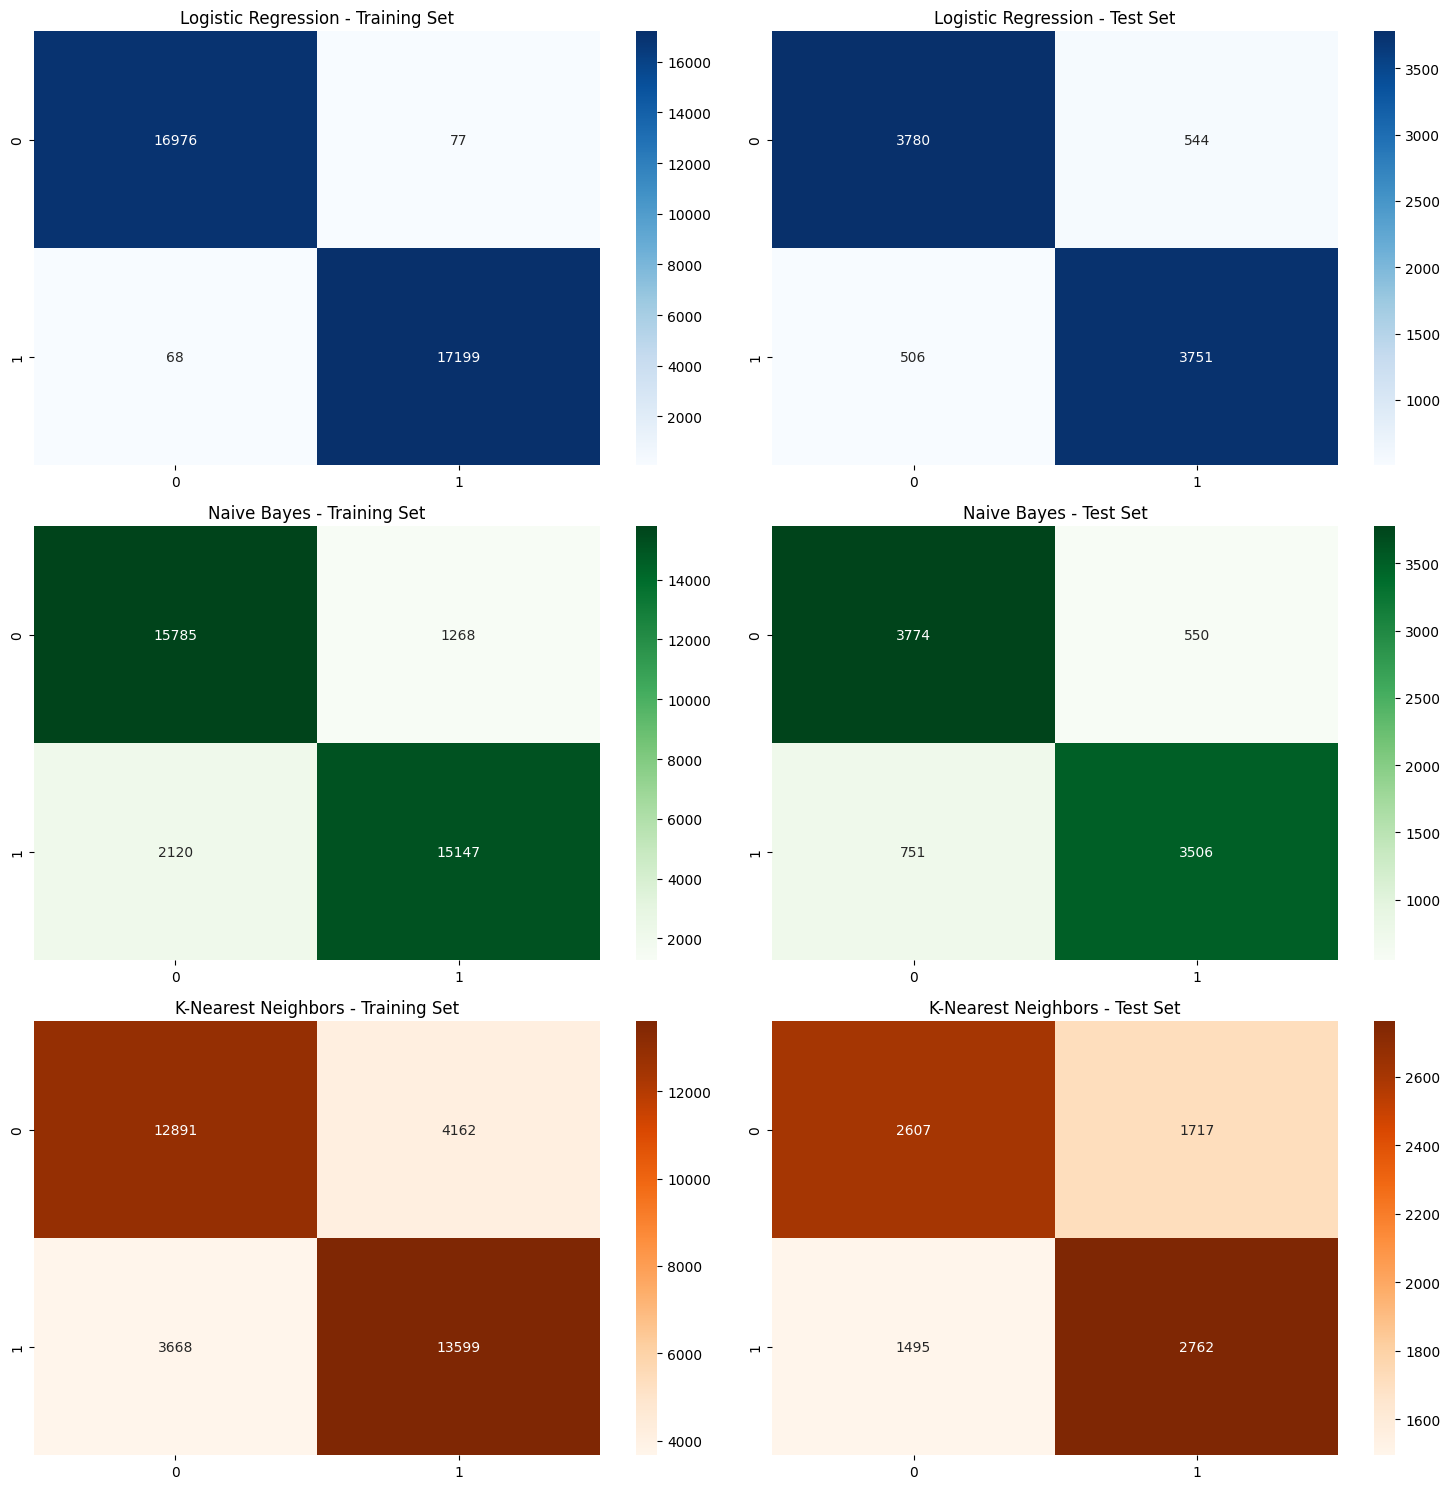

In [112]:
# Plot confusion matrices
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Logistic Regression
sns.heatmap(lr_cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression - Training Set')
sns.heatmap(lr_cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Logistic Regression - Test Set')

# Naive Bayes
sns.heatmap(nb_cm_train, annot=True, fmt='d', cmap='Greens', ax=axes[1, 0])
axes[1, 0].set_title('Naive Bayes - Training Set')
sns.heatmap(nb_cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[1, 1])
axes[1, 1].set_title('Naive Bayes - Test Set')

# K-Nearest Neighbors
sns.heatmap(knn_cm_train, annot=True, fmt='d', cmap='Oranges', ax=axes[2, 0])
axes[2, 0].set_title('K-Nearest Neighbors - Training Set')
sns.heatmap(knn_cm_test, annot=True, fmt='d', cmap='Oranges', ax=axes[2, 1])
axes[2, 1].set_title('K-Nearest Neighbors - Test Set')

plt.tight_layout()
plt.show()

# **Conclusion:**
- Logistic Regression shows high accuracy on both training and test sets, with balanced precision, recall, and F1-scores for both classes. The model performs well in correctly classifying both negative and positive instances.

- Naive Bayes also performs well, with slightly lower accuracy compared to Logistic Regression. It shows balanced precision, recall, and F1-scores for both classes, indicating good generalization ability.

- K-Nearest Neighbors (KNN) exhibits the lowest performance among the three algorithms, with lower accuracy and less balanced precision, recall, and F1-scores. The model struggles more with correctly classifying instances, especially in the test set.

In conclusion, Logistic Regression and Naive Bayes perform relatively well due to their higher accuracy for this classification task, while K-Nearest Neighbors lags behind. 